In [1]:
import os
os.chdir('..')

In [7]:
import cv2
from matplotlib import pyplot as plt

In [6]:
image_file_folder = 'data/raw_video/sliced_videos'
files = sorted(os.listdir(image_file_folder))
files = [ os.path.join(image_file_folder, f) for f in files if f.endswith('.png') ]

In [14]:
from src import img_utils
from jax import numpy as jnp

In [10]:
vid = [ cv2.imread(f, cv2.IMREAD_GRAYSCALE) for f in files[:2] ]

In [16]:
p        = jnp.array([0.5, 0.5])
d        = jnp.array([-1, 1])
mean_vid = 0.5*vid[0] + 0.5*vid[1]

fx = img_utils.sepfir2( mean_vid, d, p )
fy = img_utils.sepfir2( mean_vid, p, d )
ft = img_utils.sepfir2( vid[0] - vid[1], p, p)

h   = jnp.array([1/16, 4/16, 6/16, 4/16, 1/16])
fx2 = img_utils.sepfir2( fx*fx, h, h )
fy2 = img_utils.sepfir2( fy*fy, h, h )
fxy = img_utils.sepfir2( fx*fy, h, h )
fxt = img_utils.sepfir2( fx*ft, h, h )
fyt = img_utils.sepfir2( fy*ft, h, h )


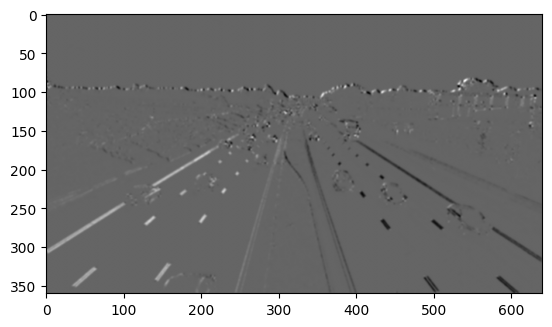

In [23]:
plt.imshow(fxy, cmap='grey')

In [24]:
fxt.shape

(360, 640)

In [26]:
combined = jnp.array([ fx, fy, ft, fx2, fy2, fxy, fxt, fyt ])
combined.shape

(8, 360, 640)

In [ ]:
def 